In [44]:
import pandas as pd
import numpy as np
#here we imported pandas and numpy libraries#

In [85]:
dataset=pd.read_csv("crx.data",header=None)
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
#here we imported the file and assigned X and Y terms to its value#

In [ ]:
p=[]
for i in range(0,dataset.shape[1]-1):
    try:
        if X[0,i].isalpha():
            p.append(i)
    except :
        continue
p
#here we get the columns which have alphabetical characters#

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset.iloc[:,-1]=le.fit_transform(dataset.iloc[:,-1])
for i in p:
    dataset.iloc[:,i]=le.fit_transform(dataset.iloc[:,i])
#using label encoder we converted alphabets to integers#

In [88]:
dataset.corr()

,0,2,3,4,5,6,7,8,9,10,11,12,14,15
0,1.000000,-0.013967,0.044990,0.047057,0.004854,0.062229,0.099863,0.025241,-0.045808,0.006799,0.052396,0.058113,0.008504,-0.000648
2,-0.013967,1.000000,-0.047608,-0.068773,0.027622,-0.016451,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.122233,0.123121,-0.206294
3,0.044990,-0.047608,1.000000,0.942463,0.011832,0.063158,-0.048423,-0.078851,-0.114926,-0.077948,0.029057,-0.094585,-0.101102,0.191431
4,0.047057,-0.068773,0.942463,1.000000,-0.038876,-0.003989,-0.065497,-0.129863,-0.162464,-0.106457,0.015342,-0.036095,-0.022904,0.187520
5,0.004854,0.027622,0.011832,-0.038876,1.000000,0.057192,0.040598,0.113752,0.132744,0.009907,0.077824,-0.018090,0.005907,-0.129398
6,0.062229,-0.016451,0.063158,-0.003989,0.057192,1.000000,-0.074281,-0.002135,0.032440,-0.015461,0.020007,-0.016338,-0.009131,-0.000877
7,0.099863,0.298902,-0.048423,-0.065497,0.040598,-0.074281,1.000000,0.345689,0.222982,0.322330,0.138139,-0.020528,0.051345,-0.322475
8,0.025241,0.244317,-0.078851,-0.129863,0.113752,-0.002135,0.345689,1.000000,0.432032,0.379532,0.091276,-0.113623,0.090012,-0.720407
9,-0.045808,0.174846,-0.114926,-0.162464,0.132744,0.032440,0.222982,0.432032,1.000000,0.571498,0.017043,-0.242568,0.077652,-0.458301
10,0.006799,0.271207,-0.077948,-0.106457,0.009907,-0.015461,0.322330,0.379532,0.571498,1.000000,0.006944,-0.139527,0.063692,-0.406410


<AxesSubplot:>

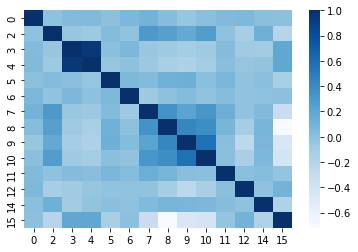

In [89]:
import seaborn as sns
sns.heatmap(dataset.corr(),cmap='Blues')

In [90]:
dataset.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [91]:
#replacing ? with nan#
for i in range(len(dataset)-1):
    if X[i,1]=='?':
        dataset=dataset.replace(X[i,1],np.nan)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [92]:
dataset=dataset.dropna()

In [93]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
X=lda.fit_transform(X,Y)

In [99]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=.2,random_state=0)

In [100]:
from xgboost import XGBClassifier
xgb=XGBClassifier(use_label_encoder=False)
xgb.fit(X_train,Y_train)

[15:42:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [101]:
y_pred=xgb.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8208955223880597